## Computer Vision Project
Finding differences between images.

In [55]:
# Import the relevant libraries
from skimage.metrics import structural_similarity
import cv2
import imutils
from PIL import Image
import requests
import numpy as np

In [56]:
#Folders to organized files
!mkdir images
!mkdir images/image

mkdir: cannot create directory ‘images’: File exists
mkdir: cannot create directory ‘images/image’: File exists


In [57]:
# Open image and display
first = Image.open('images/image/01.jpg')
second = Image.open('images/image/02.jpg')

In [58]:
# The file format of the source file.
print("First image format : ",first.format) 
print("Second image format : ",second.format)

# Image size, in pixels. The size is given as a 2-tuple (width, height).
print("First image size : ",first.size) 
print("Second image size : ",second.size) 

First image format :  JPEG
Second image format :  JPEG
First image size :  (378, 506)
Second image size :  (378, 506)


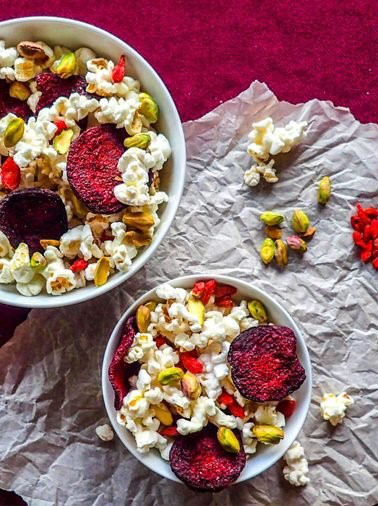

In [60]:
# Display
first

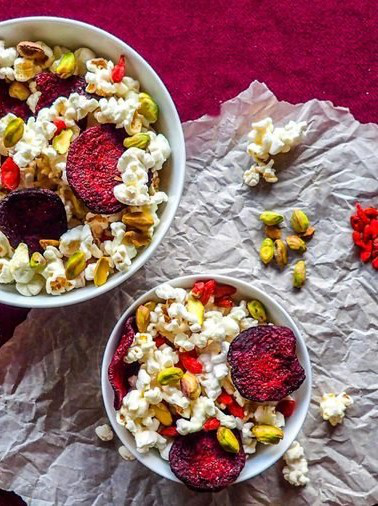

In [61]:
# Display 
second

In [62]:
# load the two images
first = cv2.imread('images/image/first.jpg')
second = cv2.imread('images/image/second.jpg')

In [63]:
# Convert images to grayscale
first_gray = cv2.cvtColor(first, cv2.COLOR_BGR2GRAY)
second_gray = cv2.cvtColor(second, cv2.COLOR_BGR2GRAY)

Converting images into grayscale using opencv. Because in image processing many applications doesn't help us in identifying the important, edges of the coloured images also coloured images are bit complex to understand by machine beacuse they have 3 channel while grayscale has only 1 channel.

In [64]:
# Compute the Structural Similarity Index (SSIM) between two images
score, diff = structural_similarity(first_gray, second_gray, full=True)
print("Similarity Score: {:.3f}%".format(score * 100))

Similarity Score: 89.694%


Finding out structural similarity of the images helped us in finding the difference or similarity in the shape of the images. Similarly, finding out the threshold and contours based on those threshold for the images converted into grayscale binary also helped us in shape analysis and recognition.

In [65]:
# The diff image contains the actual image differences between the two images
# and is represented as a floating point data type so we must convert the array 
# to 8-bit unsigned integers in the range [0,255] before we can use it with OpenCV
diff = (diff * 255).astype("uint8")

In [66]:
# Threshold the difference image, followed by finding contours to
# obtain the regions that differ between the two images
thresh = cv2.threshold(diff, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
contours = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours = contours[0] if len(contours) == 2 else contours[1]

In [67]:
# Highlight differences
mask = np.zeros(first.shape, dtype='uint8')
filled = second.copy()

In [68]:
for c in contours:
    area = cv2.contourArea(c)
    if area > 100:
        x,y,w,h = cv2.boundingRect(c)
        cv2.rectangle(first, (x, y), (x + w, y + h), (36,255,12), 2)
        cv2.rectangle(second, (x, y), (x + w, y + h), (36,255,12), 2)
        cv2.drawContours(mask, [c], 0, (0,255,0), -1)
        cv2.drawContours(filled, [c], 0, (0,255,0), -1)

First Format Image


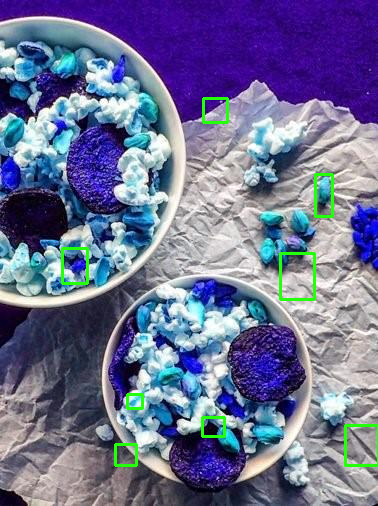

In [69]:
#Diplay first image with contour
print('First Format Image')
Image.fromarray(first)

Second Format Image


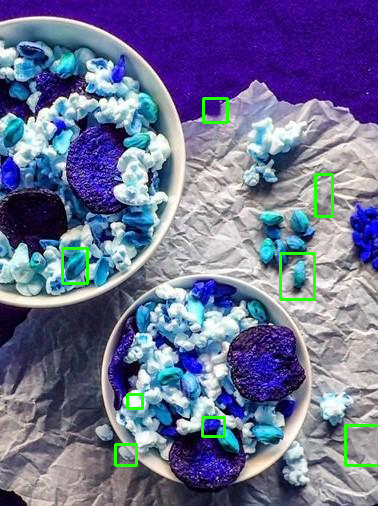

In [70]:
#Diplay second image with contour
print('Second Format Image')
Image.fromarray(second)

Different Image


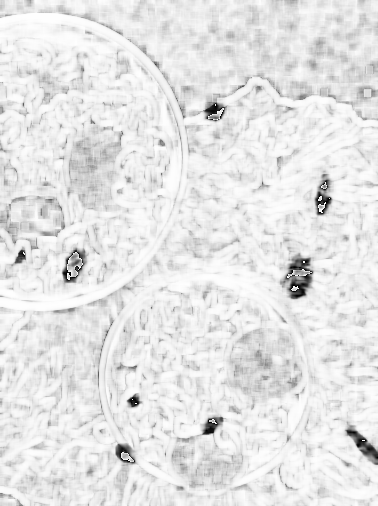

In [71]:
#Diplay difference image with black
print('Different Image')
Image.fromarray(diff)

Threshold Image


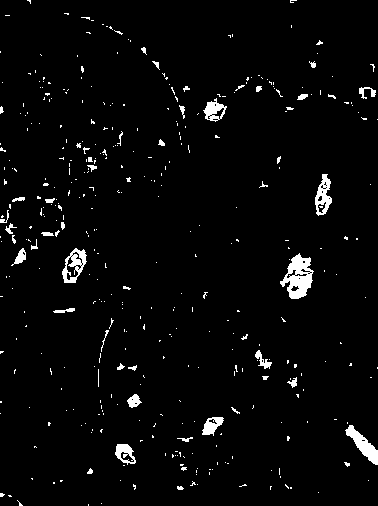

In [72]:
#Display threshold image with white
print('Threshold Image')
Image.fromarray(thresh)